<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/reviews/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Dados dos hoteis

In [ ]:
date = "2023/02/15"

## Cria o DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/tcc/data/2023/02/15/aram-beach-&-convention-gm-reviews.csv")
df['source'] = 'aram-beach-&-convention-gm-reviews.csv'
df[:1]
df.shape[0]

2679

In [ ]:
import pandas as pd
import glob
import os

path_to_lookup = f'/content/gdrive/MyDrive/tcc/data/{date}/'
file_pattern = "*.csv"

# setting the path for joining multiple files
files = os.path.join(path_to_lookup, file_pattern)

# list of merged files returned
files = glob.glob(files)

df = pd.concat(map(lambda file: pd.read_csv(file).assign(source=file.split("/")[-1]), files), ignore_index=True)
df.shape[0]

332721

In [ ]:
df = df.loc[df['text'].notna()]
df.shape[0]

209946

In [ ]:
df[['source', 'rating']].groupby(['source']).size().reset_index(name='counts').sort_values("counts", ascending=False)

,source,counts
52,pratagy-beach-all-inclusive-resort-maceió---w...,19777
14,grand-palladium-imbassaí-resort-&-spa-gm-revi...,15828
5,costão-do-santinho-resort-all-inclusive-gm-re...,10517
41,iberostar-bahia-gm-reviews.csv,10045
61,serhs-natal-grand-hotel-&-resort-gm-reviews.csv,8131
...,...,...
7,dan-inn-são-paulo-higienópolis-gm-reviews.csv,637
42,iberostar-grand-amazon-gm-reviews.csv,617
17,hotel-atlântico-avenida-gm-reviews.csv,404
24,hotel-beira-mar-gm-reviews.csv,384


In [ ]:
df.describe()

,rating,rating_max,user_photos
count,209946.00000,209946.0,117705.000000
mean,4.39211,5.0,68.633708
std,1.10198,0.0,141.699008
min,1.00000,5.0,1.000000
25%,4.00000,5.0,3.000000
50%,5.00000,5.0,13.000000
75%,5.00000,5.0,58.000000
max,5.00000,5.0,999.000000


In [ ]:
import seaborn as sns
sns.__version__


'0.11.2'

<AxesSubplot:xlabel='rating', ylabel='count'>

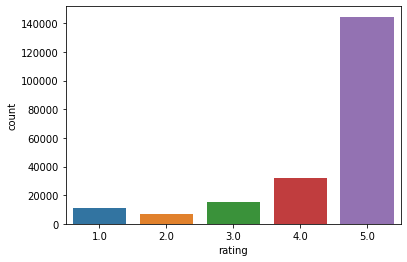

In [ ]:
sns.countplot(x="rating", data=df)

<AxesSubplot:xlabel='user_reviews', ylabel='count'>

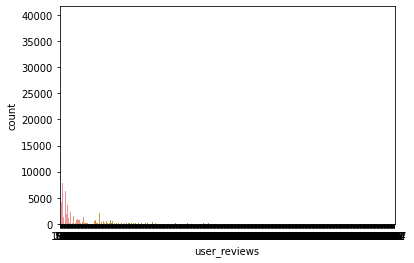

In [ ]:
sns.countplot(x="user_reviews", data=df)

In [ ]:
df[:1]

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob1lud2ZBEAE,2023-02-15 02:48:02.460131,5.0,5.0,5 horas atrás,-1,"Destaques do hotel Luxuoso, Vista linda e Tran...",Negócios | Amigos,Lucas Victor da Luz Cesar,True,21,12.0,https://www.google.com/maps/contrib/1109357607...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv


In [ ]:
from datetime import datetime, timedelta
import re

def obtem_data(row):
  
  # String de data relativa
  data_relativa_str = row.relative_date
  timestamp = row.retrieval_date
  
  # Converte a string em um objeto timedelta
  unidade_tempo = data_relativa_str.split()[1]
  quantidade_tempo = 1 if 'um' in data_relativa_str.split()[0] else int(data_relativa_str.split()[0])

  if 'segundo' in unidade_tempo:
      data_relativa = timedelta(seconds=quantidade_tempo)
  elif 'minuto' in unidade_tempo:
      data_relativa = timedelta(minutes=quantidade_tempo)
  elif 'hora' in unidade_tempo:
      data_relativa = timedelta(hours=quantidade_tempo)
  elif 'dia' in unidade_tempo:
      data_relativa = timedelta(days=quantidade_tempo)
  elif 'semana' in unidade_tempo:
      data_relativa = timedelta(weeks=quantidade_tempo)
  elif re.match(r"m(ê|e)s", unidade_tempo):
      data_relativa = timedelta(days=30*quantidade_tempo)
  elif 'ano' in unidade_tempo:
      data_relativa = timedelta(days=365*quantidade_tempo)
  else:
      return timestamp

  # Timestamp
  try:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
  except:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
  
  return (dt_timestamp - data_relativa).date()

  

teste = df.copy()
teste['data_avaliacao'] = teste.apply(obtem_data, axis=1)
teste['ano_avaliacao'] = teste['data_avaliacao'].apply(lambda x: x.year)
teste

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source,data_avaliacao
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob1lud2ZBEAE,2023-02-15 02:48:02.460131,5.0,5.0,5 horas atrás,-1,"Destaques do hotel Luxuoso, Vista linda e Tran...",Negócios | Amigos,Lucas Victor da Luz Cesar,True,21,12.0,https://www.google.com/maps/contrib/1109357607...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-14
1,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNod2FMV2t3RRAB,2023-02-15 02:48:02.476867,1.0,5.0,10 horas atrás,0,NaN,NaN,iranilson barbosa,False,7,1.0,https://www.google.com/maps/contrib/1143470110...,Fui com meu filho nas minhas férias e não reco...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-14
2,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNobnVhZlNBEAE,2023-02-15 02:48:02.482088,4.0,5.0,um dia atrás,-1,Quartos : 4/5 | Serviço : 4/5 | Local : 4/5 De...,Negócios | Sozinho,Robertoguedes Guedes,True,31,NaN,https://www.google.com/maps/contrib/1135147292...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-14
3,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoanBLT1ZBEAE,2023-02-15 02:48:02.487116,5.0,5.0,2 dias atrás,0,Quartos : 5/5 | Serviço : 5/5 | Local : 5/5 De...,Férias | Casal,ricardo pereira,False,Um,1.0,https://www.google.com/maps/contrib/1057614675...,Excelente o atendimento foi maravilhoso todos ...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-13
4,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob3YzY1JREAE,2023-02-15 02:48:02.494936,4.0,5.0,6 dias atrás,0,NaN,NaN,geraldo goncalves,True,49,16.0,https://www.google.com/maps/contrib/1049039187...,"Acabei de chegar,por enquanto não posso falar ...",NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,NaN,ChZDSUhNMG9nS0VJQ0FnSURZcGRQVmJBEAE,2023-02-15 02:52:01.493239,4.0,5.0,10 anos atrás,-1,NaN,NaN,Maria Norma Ribeiro,True,449,811.0,https://www.google.com/maps/contrib/1124115207...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17
2675,NaN,ChdDSUhNMG9nS0VJQ0FnSURZbWRMVGx3RRAB,2023-02-15 02:52:01.497862,4.0,5.0,10 anos atrás,0,NaN,NaN,Ane Gracielle Albuquerque,False,9,9.0,https://www.google.com/maps/contrib/1052859806...,Estou hospedada no hotel -ago/2012- e achei os...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17
2676,NaN,ChZDSUhNMG9nS0VJQ0FnSURZbGQteWNREAE,2023-02-15 02:52:01.503724,3.0,5.0,10 anos atrás,0,NaN,NaN,Evandro Ferraz,False,10,NaN,https://www.google.com/maps/contrib/1029729585...,Hotel quatro estrelas com muita boa vontade. O...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17
2677,NaN,ChdDSUhNMG9nS0VJQ0FnSURZNWZDZGdnRRAB,2023-02-15 02:52:01.508527,5.0,5.0,11 anos atrás,-1,NaN,NaN,Edvaldo Nunes,True,68,286.0,https://www.google.com/maps/contrib/1083549432...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2012-02-18


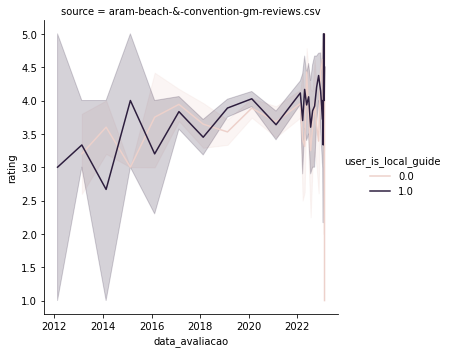

In [ ]:
import seaborn as sns

sns.relplot(x='data_avaliacao', y='rating', col='source', hue='user_is_local_guide',
    kind="line", data=teste)

In [ ]:
aux = teste.copy()[['rating', 'text', 'data_avaliacao', 'user_is_local_guide', 'user_reviews']]
aux.head()

,rating,text,data_avaliacao,user_is_local_guide,user_reviews
0,5.0,NaN,2023-02-14,True,21
1,1.0,Fui com meu filho nas minhas férias e não reco...,2023-02-14,False,7
2,4.0,NaN,2023-02-14,True,31
3,5.0,Excelente o atendimento foi maravilhoso todos ...,2023-02-13,False,Um
4,4.0,"Acabei de chegar,por enquanto não posso falar ...",2023-02-09,True,49


In [ ]:
aux['data_avaliacao'] = aux['data_avaliacao'].apply(lambda x: x.year)

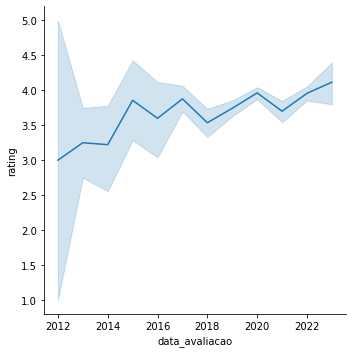

In [ ]:
sns.relplot(x='data_avaliacao', y='rating', kind="line", data=aux)